<a href="https://colab.research.google.com/github/rsonar821/Diamond-Streamlit-Heroku-Deployment/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Innomatics/Diamond Price Prediction/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.shape

(53940, 10)

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [11]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [13]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

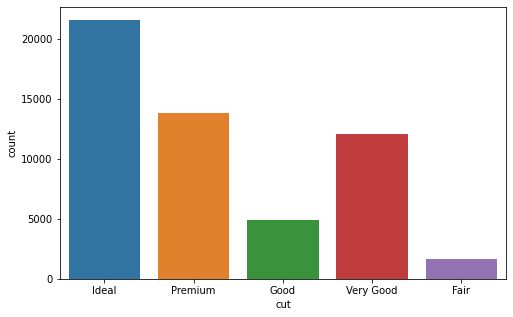

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(df['cut'])

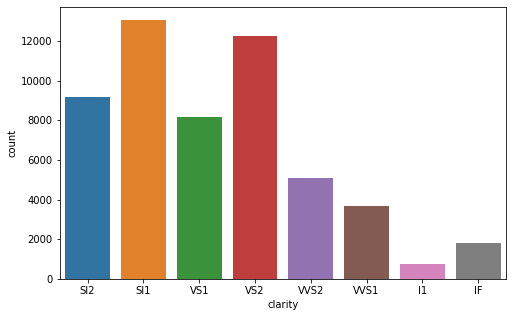

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df['clarity'])

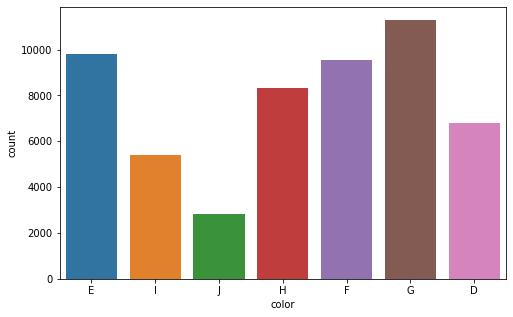

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(df['color'])

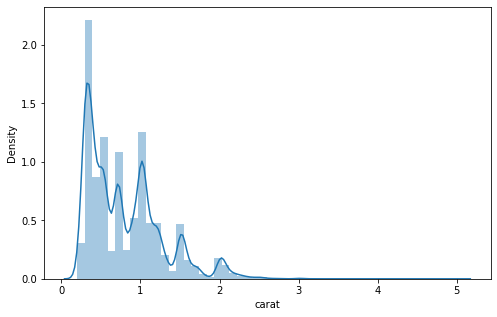

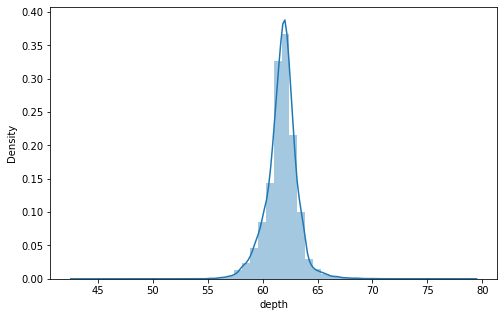

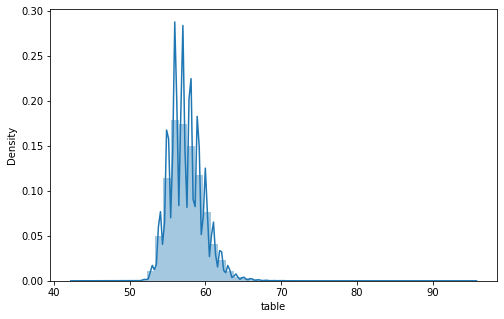

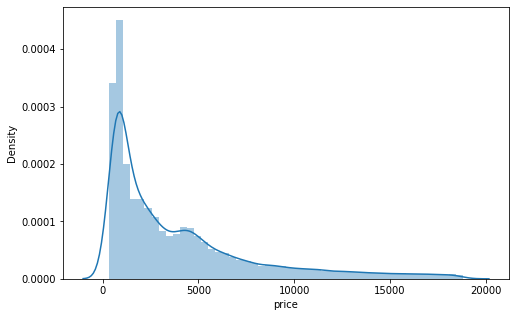

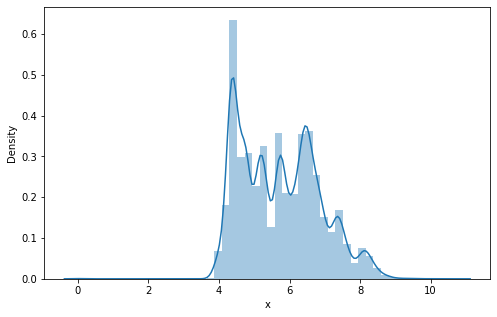

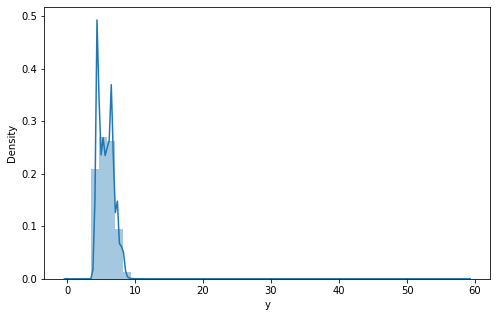

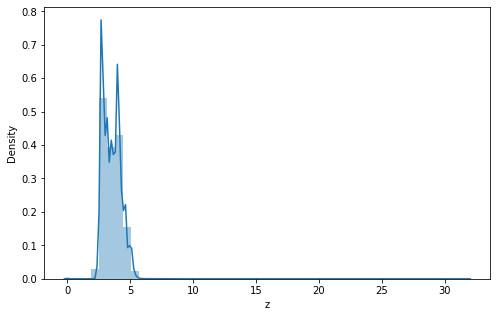

In [17]:
con_var = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for i in con_var:
  plt.figure(figsize=(8,5))
  fig = sns.distplot(df[i])
  plt.show(fig)

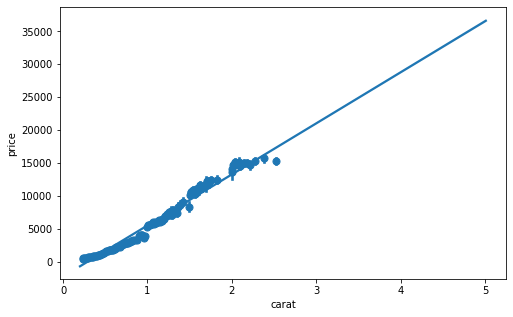

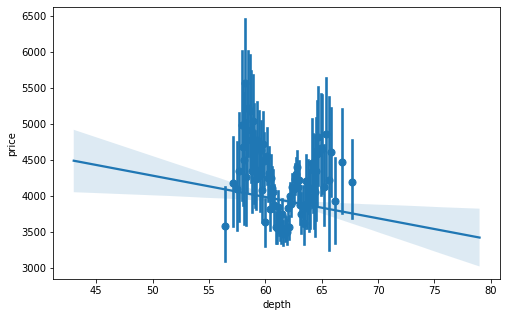

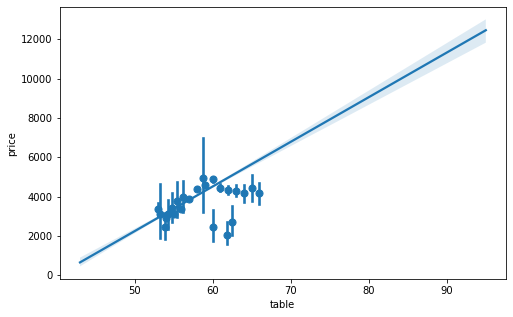

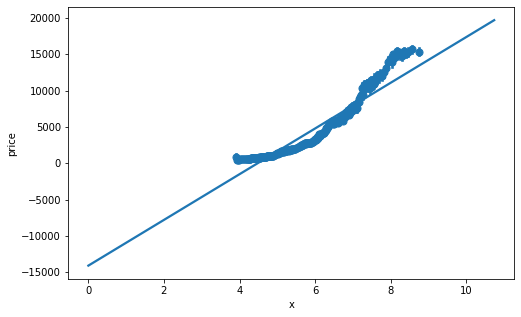

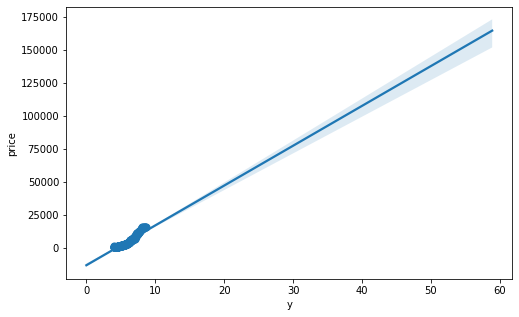

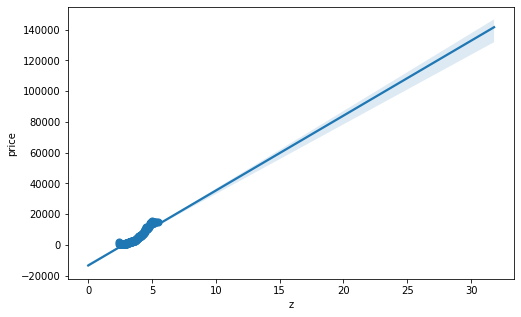

In [18]:
for i in con_var:
  if i=='price':
    continue
  plt.figure(figsize=(8,5))
  fig = sns.regplot(x=df[i], y=df['price'], x_bins=500)
  plt.show(fig)

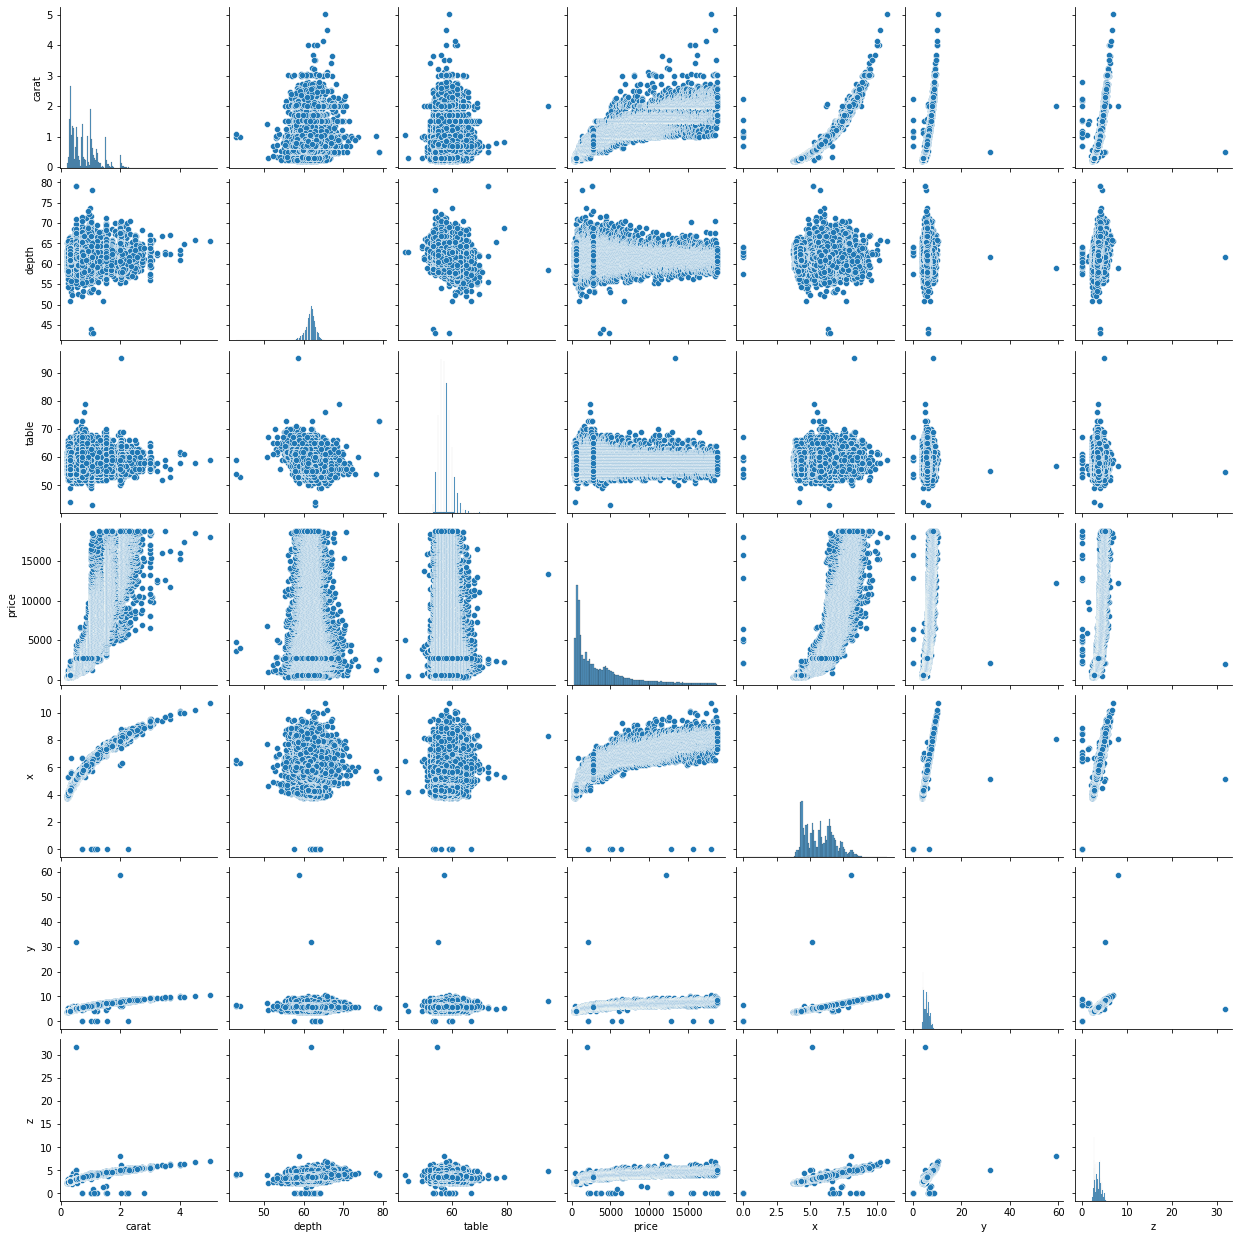

In [19]:
sns.pairplot(df)

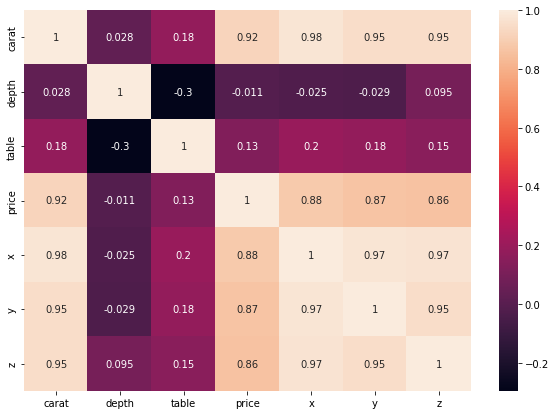

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

In [21]:
X = df.drop('price', axis=1)
Y = df['price']

In [22]:
cut_encoder = {'Fair':1, 'Good':2, 'Very Good':3, 'Ideal':4, 'Premium':5}
X['cut'] = X['cut'].apply(lambda x : cut_encoder[x])

In [23]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
X['color'] = X['color'].apply(lambda x : color_encoder[x])

In [24]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
X['clarity'] = X['clarity'].apply(lambda x : clarity_encoder[x])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [26]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## **Linear Regression**

In [27]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
lr_test_preds = linear_regressor.predict(X_test)

In [29]:
results_df = pd.DataFrame(columns=['Model Name', 'R2 Score', 'MSE', 'RMSE', 'MAE'])

In [30]:
results_df.loc[0,'Model Name'] = 'Linear Regression'
results_df.loc[0,'R2 Score'] = round(r2_score(Y_test, lr_test_preds), 2)
results_df.loc[0,'MSE'] = round(mean_squared_error(Y_test, lr_test_preds), 2)
results_df.loc[0,'RMSE'] = round(math.sqrt(mean_squared_error(Y_test, lr_test_preds)), 2)
results_df.loc[0,'MAE'] = round(mean_absolute_error(Y_test, lr_test_preds),2)

## **Decision Tree**

In [31]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
dt_test_preds = dt_regressor.predict(X_test)

In [33]:
results_df.loc[1,'Model Name'] = 'Decision Tree Regressor'
results_df.loc[1,'R2 Score'] = round(r2_score(Y_test, dt_test_preds), 2)
results_df.loc[1,'MSE'] = round(mean_squared_error(Y_test, dt_test_preds), 2)
results_df.loc[1,'RMSE'] = round(math.sqrt(mean_squared_error(Y_test, dt_test_preds)), 2)
results_df.loc[1,'MAE'] = round(mean_absolute_error(Y_test, dt_test_preds), 2)

## **Random Forest Regressor**

In [34]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
rf_test_preds = rf_regressor.predict(X_test)

In [36]:
results_df.loc[2,'Model Name'] = 'Random Forest Regressor'
results_df.loc[2,'R2 Score'] = round(r2_score(Y_test, rf_test_preds), 2)
results_df.loc[2,'MSE'] = round(mean_squared_error(Y_test, rf_test_preds), 2)
results_df.loc[2,'RMSE'] = round(math.sqrt(mean_squared_error(Y_test, rf_test_preds)), 2)
results_df.loc[2,'MAE'] = round(mean_absolute_error(Y_test, rf_test_preds), 2)

## **XGB Regressor**

In [37]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, Y_train)

[11:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [38]:
xgb_test_preds = xgb_regressor.predict(X_test)

In [39]:
results_df.loc[3,'Model Name'] = 'XGB Regressor'
results_df.loc[3,'R2 Score'] = round(r2_score(Y_test, xgb_test_preds), 2)
results_df.loc[3,'MSE'] = round(mean_squared_error(Y_test, xgb_test_preds), 2)
results_df.loc[3,'RMSE'] = round(math.sqrt(mean_squared_error(Y_test, xgb_test_preds)), 2)
results_df.loc[3,'MAE'] = round(mean_absolute_error(Y_test, xgb_test_preds), 2)

## **Gradient Boosting Regressor**

In [40]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)

GradientBoostingRegressor()

In [41]:
gb_test_preds = gb_regressor.predict(X_test)

In [42]:
results_df.loc[4,'Model Name'] = 'Gradient Boosting Regressor'
results_df.loc[4,'R2 Score'] = round(r2_score(Y_test, gb_test_preds), 2)
results_df.loc[4,'MSE'] = round(mean_squared_error(Y_test, gb_test_preds), 2)
results_df.loc[4,'RMSE'] = round(math.sqrt(mean_squared_error(Y_test, gb_test_preds)), 2)
results_df.loc[4,'MAE'] = round(mean_absolute_error(Y_test, gb_test_preds), 2)

In [43]:
results_df

,Model Name,R2 Score,MSE,RMSE,MAE
0,Linear Regression,0.88,1977507.58,1406.24,819.58
1,Decision Tree Regressor,0.97,555556.25,745.36,364.76
2,Random Forest Regressor,0.98,300088.14,547.8,268.83
3,XGB Regressor,0.98,396979.25,630.06,340.86
4,Gradient Boosting Regressor,0.97,398093.15,630.95,343.2


### **Random Forest Regressor is the best working algorithm for the model**

In [44]:
with open('scale.pkl', 'wb') as file_output:
    pickle.dump(std, file_output)

with open('linear_regression.pkl', 'wb') as file_output:
    pickle.dump(linear_regressor, file_output)

with open('decision_tree_regressor.pkl', 'wb') as file_output:
    pickle.dump(dt_regressor, file_output)

with open('random_forest_regressor.pkl', 'wb') as file_output:
    pickle.dump(rf_regressor, file_output)

with open('xgb_regressor.pkl', 'wb') as file_output:
    pickle.dump(xgb_regressor, file_output)

with open('gb_regressor.pkl', 'wb') as file_output:
    pickle.dump(gb_regressor, file_output)

In [59]:
scale = pickle.load(open('scale.pkl','rb'))
algorithm = pickle.load(open('gb_regressor.pkl','rb'))

In [60]:
data = np.array([0.23, 4, 6, 2, 61.5, 55.0, 3.95, 3.98, 2.43])
data = data.reshape(1, -1)
data = scale.fit_transform(data)
my_prediction = algorithm.predict(data)
print(my_prediction)

[3085.76402379]


In [61]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,5,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,5,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


In [62]:
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64